In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime as dt, timedelta
import requests

from importlib import reload
# Use to do reload(load_data)

import load_data

In [2]:
%%time
df_test = load_data.load_timing_df()

CPU times: user 3min 52s, sys: 3.67 s, total: 3min 56s
Wall time: 3min 58s


In [3]:
df_test.head()

,output_addr_str,epoch,hash,time,input_addr,output_addr,input_value_tot,output_value_tot,fee,dt_time,n_outputs,n_inputs,input_addr_str,input_value_tot_usd,output_vaue_tot_usd,is_batched,arrival_times,output_value_totusd_historical
0,"112L4xQjAHXZwvU8PvizyM6tLeG5RfZ4Dk,3QxZrCtQTrx...",3998,3e7d4d6dcbb25c9578e2cdd2a931c9bf5e1a6e49ad9383...,1659566303,"['35h39Pv9WsGLy3KHWhmJ5va7jxRrd6rfVm', '38b4Wg...","['112L4xQjAHXZwvU8PvizyM6tLeG5RfZ4Dk', '3QxZrC...",3367203540,3367188735,14805,2022-08-03 18:38:23,2,10,"35h39Pv9WsGLy3KHWhmJ5va7jxRrd6rfVm,38b4Wgtdrdn...",740784.78,740781.52,True,[2022-08-03 18:38:03],774722.29736
1,"112L4xQjAHXZwvU8PvizyM6tLeG5RfZ4Dk,3QxZrCtQTrx...",3998,f18caefefe31d2ba11f44a1efa957f5603ec576d0cee48...,1659566283,"['38d9qk6rzXGGdhEa5Kwz7EyMcfcHcb8RZz', '3NWH6Q...","['112L4xQjAHXZwvU8PvizyM6tLeG5RfZ4Dk', '3QxZrC...",154280138,154276253,3885,2022-08-03 18:38:03,2,2,"38d9qk6rzXGGdhEa5Kwz7EyMcfcHcb8RZz,3NWH6Qirki9...",33941.63,33940.78,True,[],774722.29736
2,1215bzNH2G2jVcgToAaxtaC3My6BamqvVc,835,16b7785b3baf60e62f73851774f5a67e2b558e7a8c90ea...,1659376517,['bc1qptal06y9hedtc3t7a2468dnjle4kl2kgp36nfa'],['1215bzNH2G2jVcgToAaxtaC3My6BamqvVc'],10000000,9996820,3180,2022-08-01 13:55:17,1,1,bc1qptal06y9hedtc3t7a2468dnjle4kl2kgp36nfa,2200.00,2199.30,True,[],6596.21050
3,1215bzNH2G2jVcgToAaxtaC3My6BamqvVc,835,f25b64579f6838e491199129307ebfa1f4634b47760a51...,1659376541,['1JKtgVyaVEVxZ4tnts7oywaQRhnHsXSKji'],['1215bzNH2G2jVcgToAaxtaC3My6BamqvVc'],15000000,14996820,3180,2022-08-01 13:55:41,1,1,1JKtgVyaVEVxZ4tnts7oywaQRhnHsXSKji,3300.00,3299.30,True,[2022-08-01 13:55:17],6596.21050
4,"1222XENhsyMANN7vha1m7Hg7L3aQUC24mu,bc1qw9fhylp...",2649,6deba59bc92d5ede57c775a4a63823f6a8b2a96319902e...,1659485358,"['bc1qy22cz0qgpevhhpcndgs6tuy9wel5d78de9pv7d',...","['1222XENhsyMANN7vha1m7Hg7L3aQUC24mu', 'bc1qw9...",194398,192278,2120,2022-08-02 20:09:18,2,2,"bc1qy22cz0qgpevhhpcndgs6tuy9wel5d78de9pv7d,bc1...",42.77,42.30,True,[],63.98436


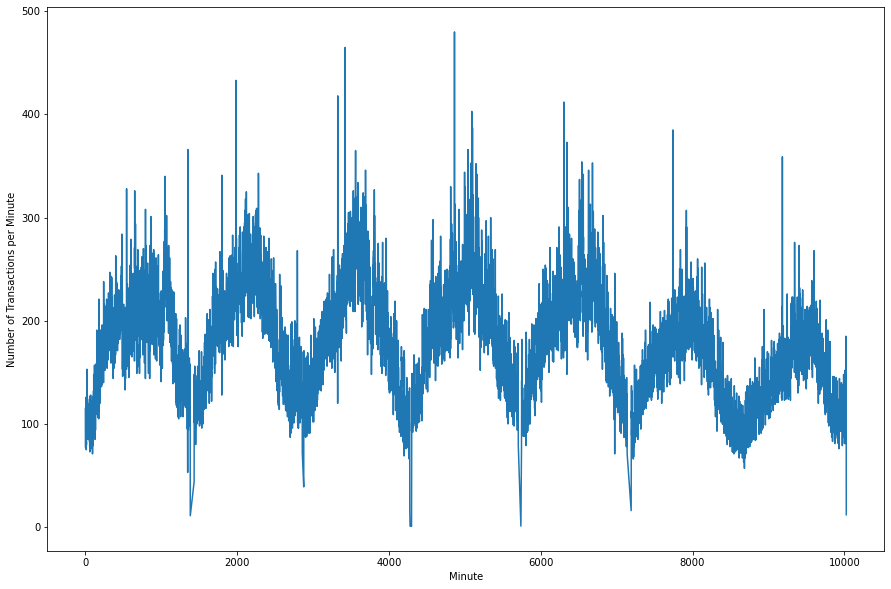

In [4]:
fig, ax = plt.subplots(figsize=(15,10))

plt.plot(df_test.groupby('epoch').count().hash)
plt.xlabel('Minute')
plt.ylabel('Number of Transactions per Minute')

plt.show()

In [5]:
print(df_test.dt_time.min(), df_test.dt_time.max())

2022-08-01 00:00:00 2022-08-07 23:05:05


In [6]:
df_test.head()

,output_addr_str,epoch,hash,time,input_addr,output_addr,input_value_tot,output_value_tot,fee,dt_time,n_outputs,n_inputs,input_addr_str,input_value_tot_usd,output_vaue_tot_usd,is_batched,arrival_times,output_value_totusd_historical
0,"112L4xQjAHXZwvU8PvizyM6tLeG5RfZ4Dk,3QxZrCtQTrx...",3998,3e7d4d6dcbb25c9578e2cdd2a931c9bf5e1a6e49ad9383...,1659566303,"['35h39Pv9WsGLy3KHWhmJ5va7jxRrd6rfVm', '38b4Wg...","['112L4xQjAHXZwvU8PvizyM6tLeG5RfZ4Dk', '3QxZrC...",3367203540,3367188735,14805,2022-08-03 18:38:23,2,10,"35h39Pv9WsGLy3KHWhmJ5va7jxRrd6rfVm,38b4Wgtdrdn...",740784.78,740781.52,True,[2022-08-03 18:38:03],774722.29736
1,"112L4xQjAHXZwvU8PvizyM6tLeG5RfZ4Dk,3QxZrCtQTrx...",3998,f18caefefe31d2ba11f44a1efa957f5603ec576d0cee48...,1659566283,"['38d9qk6rzXGGdhEa5Kwz7EyMcfcHcb8RZz', '3NWH6Q...","['112L4xQjAHXZwvU8PvizyM6tLeG5RfZ4Dk', '3QxZrC...",154280138,154276253,3885,2022-08-03 18:38:03,2,2,"38d9qk6rzXGGdhEa5Kwz7EyMcfcHcb8RZz,3NWH6Qirki9...",33941.63,33940.78,True,[],774722.29736
2,1215bzNH2G2jVcgToAaxtaC3My6BamqvVc,835,16b7785b3baf60e62f73851774f5a67e2b558e7a8c90ea...,1659376517,['bc1qptal06y9hedtc3t7a2468dnjle4kl2kgp36nfa'],['1215bzNH2G2jVcgToAaxtaC3My6BamqvVc'],10000000,9996820,3180,2022-08-01 13:55:17,1,1,bc1qptal06y9hedtc3t7a2468dnjle4kl2kgp36nfa,2200.00,2199.30,True,[],6596.21050
3,1215bzNH2G2jVcgToAaxtaC3My6BamqvVc,835,f25b64579f6838e491199129307ebfa1f4634b47760a51...,1659376541,['1JKtgVyaVEVxZ4tnts7oywaQRhnHsXSKji'],['1215bzNH2G2jVcgToAaxtaC3My6BamqvVc'],15000000,14996820,3180,2022-08-01 13:55:41,1,1,1JKtgVyaVEVxZ4tnts7oywaQRhnHsXSKji,3300.00,3299.30,True,[2022-08-01 13:55:17],6596.21050
4,"1222XENhsyMANN7vha1m7Hg7L3aQUC24mu,bc1qw9fhylp...",2649,6deba59bc92d5ede57c775a4a63823f6a8b2a96319902e...,1659485358,"['bc1qy22cz0qgpevhhpcndgs6tuy9wel5d78de9pv7d',...","['1222XENhsyMANN7vha1m7Hg7L3aQUC24mu', 'bc1qw9...",194398,192278,2120,2022-08-02 20:09:18,2,2,"bc1qy22cz0qgpevhhpcndgs6tuy9wel5d78de9pv7d,bc1...",42.77,42.30,True,[],63.98436


In [7]:
df_test.shape

(1746624, 18)

In [8]:
df_test['n_txs_past'] = df_test.arrival_times.apply(len)

In [9]:
# % of transactions sent to outputs with past transaxtions
df_test['has_tx_history'] = df_test['n_txs_past'] >= 2
r = df_test.groupby('is_batched')['has_tx_history'].agg(['sum', 'count'])
100. * r['sum'] / r['count']

is_batched
False    12.372974
True     91.832694
dtype: float64

## Filter Out Potential Exchanges

#### Get rid of transactions over the p99 historical # of tx's and total USD value

In [10]:
past_tx_distr = df_test[df_test.n_txs_past > 0].groupby('output_addr_str').output_value_totusd_historical.max()
m_historical = np.percentile(past_tx_distr[past_tx_distr > 0], 99)

past_tx_distr_n = df_test.groupby('output_addr_str').n_txs_past.max()
m_tx_historical = np.percentile(past_tx_distr_n[past_tx_distr_n > 0], 99)

m_historical, m_tx_historical

(3427415.34662117, 25.0)

In [11]:
df_filter = df_test[df_test.is_batched & ((df_test.output_value_totusd_historical <= m_historical) | 
            (df_test.n_txs_past <= m_tx_historical))]

100. * len(df_filter) / len(df_test[df_test.is_batched])

69.40481427942933

In [12]:
addr_large = df_filter.output_addr_str.unique()
n_addr_tot = len(df_test[df_test.is_batched].output_addr_str.unique())
n_addr_tot - len(addr_large), n_addr_tot

(24, 2140)

In [13]:
len(df_filter) / 7., df_filter.output_vaue_tot_usd.sum() / 7.

(3155.1428571428573, 53200632.98428571)

#### Look at Batch Sizes

In [14]:
batch_sizes = df_filter.groupby(['epoch', 'output_addr_str'])['time'].count()

# total # of instances of batching
len(batch_sizes)

6451

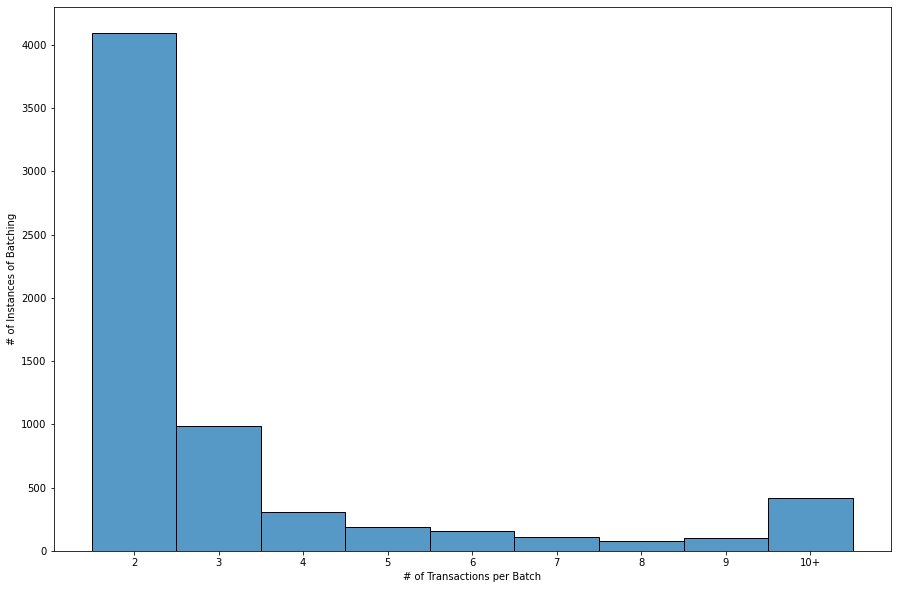

In [15]:
fig, axes = plt.subplots(figsize=(15,10))

cat = [min(b, 10) for b in batch_sizes]
sns.histplot(cat, bins = np.arange(2,12))

plt.xticks(np.arange(2,11)+0.5, labels=[str(n) for n in np.arange(2,10)] + ['10+'])

plt.ylabel('# of Instances of Batching')
plt.xlabel('# of Transactions per Batch')
plt.show()

In [16]:
len(batch_sizes[batch_sizes >= 5]), 100. * len(batch_sizes[batch_sizes >= 5]) / len(batch_sizes)

(1059, 16.416059525654937)

In [17]:
df_filter = df_filter.join(pd.DataFrame(batch_sizes), 
               on=['epoch', 'output_addr_str'], rsuffix='_tmp').rename(columns={'time_tmp': 'batch_size'})

In [18]:
df_filter = df_filter[df_filter.batch_size <= 5]

In [19]:
df_test_filter = df_test[((df_test.output_value_totusd_historical <= m_historical) | 
            (df_test.n_txs_past <= m_tx_historical))]
df_test_filter = df_test_filter[~df_test_filter.is_batched]
df_test_filter['batch_size'] = 1
df_base = pd.concat([df_test_filter, df_filter]).reset_index()

In [20]:
df_base.head()

,index,output_addr_str,epoch,hash,time,input_addr,output_addr,input_value_tot,output_value_tot,fee,...,n_inputs,input_addr_str,input_value_tot_usd,output_vaue_tot_usd,is_batched,arrival_times,output_value_totusd_historical,n_txs_past,has_tx_history,batch_size
0,31822,"1111111111111111111114oLvT2,111111111111111111...",2207,ceb08c82f543781ffcb710cb882f6f57c2135959c1d0f3...,1659458871,['14p19AeJg6NubeQTa8bF2TpgbprcoivyrS'],"['1111111111111111111114oLvT2', '1111111111111...",381092073,381081513,10560,...,1,14p19AeJg6NubeQTa8bF2TpgbprcoivyrS,83840.26,83837.93,False,[],1.147132e+07,0,False,1
1,31823,"1111111111111111111114oLvT2,111111111111111111...",2212,80fb6a5203a0f07d6e9a3ea0993c882b5e2e99c400386d...,1659459153,['14p19AeJg6NubeQTa8bF2TpgbprcoivyrS'],"['1111111111111111111114oLvT2', '1111111111111...",380625633,380617889,7744,...,1,14p19AeJg6NubeQTa8bF2TpgbprcoivyrS,83737.64,83735.94,False,[2022-08-02 12:47:51],1.147132e+07,1,False,1
2,31824,"1111111111111111111114oLvT2,111111111111111111...",2213,b0e6be3bfd36a5c3af2f8dc9e89934ac9f2a2070cd241c...,1659459230,['14p19AeJg6NubeQTa8bF2TpgbprcoivyrS'],"['1111111111111111111114oLvT2', '1111111111111...",380162009,380154968,7041,...,1,14p19AeJg6NubeQTa8bF2TpgbprcoivyrS,83635.64,83634.09,False,"[2022-08-02 12:47:51, 2022-08-02 12:52:33]",1.147132e+07,2,True,1
3,31825,"1111111111111111111114oLvT2,111111111111111111...",2228,8c1f6ef1d494d443c2bc72bf49d2d69c687a2171ca8a86...,1659460138,['14p19AeJg6NubeQTa8bF2TpgbprcoivyrS'],"['1111111111111111111114oLvT2', '1111111111111...",379699088,379692752,6336,...,1,14p19AeJg6NubeQTa8bF2TpgbprcoivyrS,83533.80,83532.41,False,"[2022-08-02 12:47:51, 2022-08-02 12:52:33, 202...",1.147132e+07,3,True,1
4,31826,"1111111111111111111114oLvT2,111111111111111111...",2229,d43583efd1e0df7f00c780a5948bc284e9d72ab82643bb...,1659460195,['14p19AeJg6NubeQTa8bF2TpgbprcoivyrS'],"['1111111111111111111114oLvT2', '1111111111111...",379236872,379229831,7041,...,1,14p19AeJg6NubeQTa8bF2TpgbprcoivyrS,83432.11,83430.56,False,"[2022-08-02 12:47:51, 2022-08-02 12:52:33, 202...",1.147132e+07,4,True,1


### Look at Value of g

In [21]:
D_MAX = timedelta(days=100000)

def compute_g_percentile(times, p=75):
    diffs = np.diff(times)
    zeros = sum(diffs == timedelta(0))
    if zeros == len(diffs):
        return D_MAX
    else:
        return np.percentile(diffs[diffs != timedelta(0)], p)

df_base['g_75'] = df_base.arrival_times.apply(compute_g_percentile)

In [22]:
def bucket_time(t):
    if t == D_MAX:
        return 5
    if t <= timedelta(minutes = 60):
        return 0
    if t <= timedelta(minutes = 60*12):
        return 1
    if t <= timedelta(minutes = 60*24):
        return 2
    if t <= timedelta(minutes = 60*48):
        return 3
    return 4

time_labels = ['<1 hr', '1-12 hrs', '12-24 hrs', '1-2 days', '>2 days', 'Infinite\n(No other tx)']

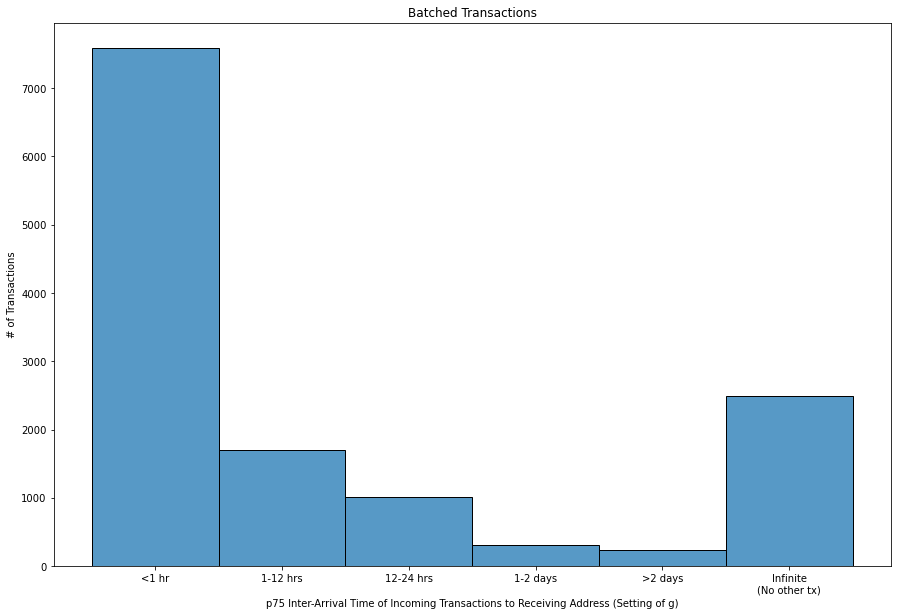

In [23]:
fig, axes = plt.subplots(figsize=(15,10))
sns.histplot(df_base[df_base.is_batched].g_75.apply(bucket_time), bins = np.arange(0,7))
plt.xticks(np.arange(0,6)+0.5, labels=time_labels)
plt.ylabel('# of Transactions')
plt.xlabel('p75 Inter-Arrival Time of Incoming Transactions to Receiving Address (Setting of g)')
plt.title('Batched Transactions')
plt.show()

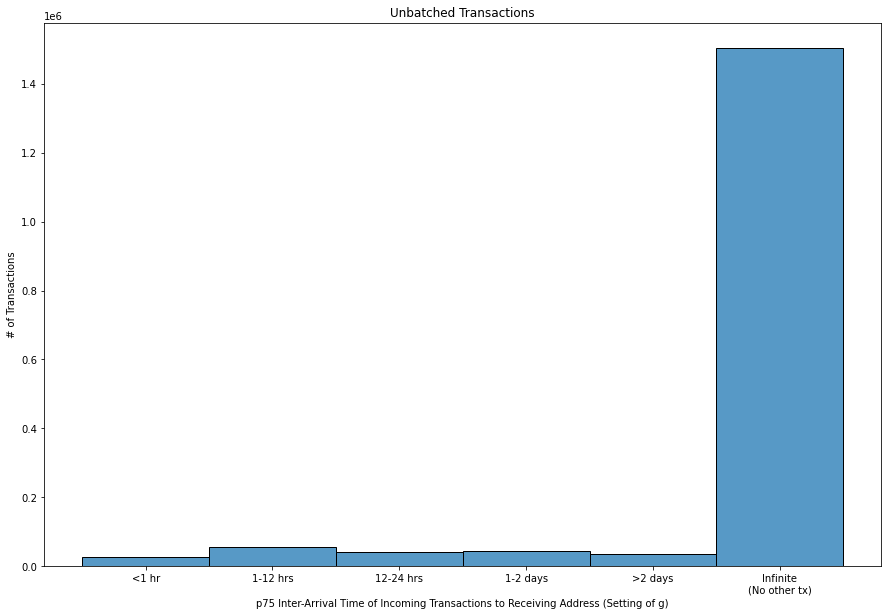

In [24]:
fig, axes = plt.subplots(figsize=(15,10))
sns.histplot(df_base[~df_base.is_batched].g_75.apply(bucket_time), bins = np.arange(0,7))
plt.xticks(np.arange(0,6)+0.5, labels=time_labels)
plt.ylabel('# of Transactions')
plt.xlabel('p75 Inter-Arrival Time of Incoming Transactions to Receiving Address (Setting of g)')
plt.title('Unbatched Transactions')
plt.show()

### Simulate Mechanism

In [25]:
default_g = df_base[df_base.is_batched & (df_base.g_75 <= timedelta(days=10000))].g_75.mean()
default_g

Timedelta('0 days 05:28:49.395635323')

In [26]:
df_base.head()

,index,output_addr_str,epoch,hash,time,input_addr,output_addr,input_value_tot,output_value_tot,fee,...,input_addr_str,input_value_tot_usd,output_vaue_tot_usd,is_batched,arrival_times,output_value_totusd_historical,n_txs_past,has_tx_history,batch_size,g_75
0,31822,"1111111111111111111114oLvT2,111111111111111111...",2207,ceb08c82f543781ffcb710cb882f6f57c2135959c1d0f3...,1659458871,['14p19AeJg6NubeQTa8bF2TpgbprcoivyrS'],"['1111111111111111111114oLvT2', '1111111111111...",381092073,381081513,10560,...,14p19AeJg6NubeQTa8bF2TpgbprcoivyrS,83840.26,83837.93,False,[],1.147132e+07,0,False,1,100000 days 00:00:00
1,31823,"1111111111111111111114oLvT2,111111111111111111...",2212,80fb6a5203a0f07d6e9a3ea0993c882b5e2e99c400386d...,1659459153,['14p19AeJg6NubeQTa8bF2TpgbprcoivyrS'],"['1111111111111111111114oLvT2', '1111111111111...",380625633,380617889,7744,...,14p19AeJg6NubeQTa8bF2TpgbprcoivyrS,83737.64,83735.94,False,[2022-08-02 12:47:51],1.147132e+07,1,False,1,100000 days 00:00:00
2,31824,"1111111111111111111114oLvT2,111111111111111111...",2213,b0e6be3bfd36a5c3af2f8dc9e89934ac9f2a2070cd241c...,1659459230,['14p19AeJg6NubeQTa8bF2TpgbprcoivyrS'],"['1111111111111111111114oLvT2', '1111111111111...",380162009,380154968,7041,...,14p19AeJg6NubeQTa8bF2TpgbprcoivyrS,83635.64,83634.09,False,"[2022-08-02 12:47:51, 2022-08-02 12:52:33]",1.147132e+07,2,True,1,0 days 00:04:42
3,31825,"1111111111111111111114oLvT2,111111111111111111...",2228,8c1f6ef1d494d443c2bc72bf49d2d69c687a2171ca8a86...,1659460138,['14p19AeJg6NubeQTa8bF2TpgbprcoivyrS'],"['1111111111111111111114oLvT2', '1111111111111...",379699088,379692752,6336,...,14p19AeJg6NubeQTa8bF2TpgbprcoivyrS,83533.80,83532.41,False,"[2022-08-02 12:47:51, 2022-08-02 12:52:33, 202...",1.147132e+07,3,True,1,0 days 00:03:50.750000
4,31826,"1111111111111111111114oLvT2,111111111111111111...",2229,d43583efd1e0df7f00c780a5948bc284e9d72ab82643bb...,1659460195,['14p19AeJg6NubeQTa8bF2TpgbprcoivyrS'],"['1111111111111111111114oLvT2', '1111111111111...",379236872,379229831,7041,...,14p19AeJg6NubeQTa8bF2TpgbprcoivyrS,83432.11,83430.56,False,"[2022-08-02 12:47:51, 2022-08-02 12:52:33, 202...",1.147132e+07,4,True,1,0 days 00:09:55


In [27]:
df_base['g'] = [default_g if g == timedelta(days=100000) else g for g in df_base.g_75]

In [188]:
df_base.head()

,output_addr_str,epoch,hash,time,input_addr,output_addr,input_value_tot,output_value_tot,fee,dt_time,...,input_value_tot_usd,output_vaue_tot_usd,is_batched,arrival_times,output_value_totusd_historical,n_txs_past,has_tx_history,g_75,batch_size,g
0,"112L4xQjAHXZwvU8PvizyM6tLeG5RfZ4Dk,3QxZrCtQTrx...",3998,3e7d4d6dcbb25c9578e2cdd2a931c9bf5e1a6e49ad9383...,1659566303,"['35h39Pv9WsGLy3KHWhmJ5va7jxRrd6rfVm', '38b4Wg...","['112L4xQjAHXZwvU8PvizyM6tLeG5RfZ4Dk', '3QxZrC...",3367203540,3367188735,14805,2022-08-03 18:38:23,...,740784.78,740781.52,True,[2022-08-03 18:38:03],774722.29736,1,False,100000 days 00:00:00,1,0 days 03:12:22.210044780
1,"112L4xQjAHXZwvU8PvizyM6tLeG5RfZ4Dk,3QxZrCtQTrx...",3998,f18caefefe31d2ba11f44a1efa957f5603ec576d0cee48...,1659566283,"['38d9qk6rzXGGdhEa5Kwz7EyMcfcHcb8RZz', '3NWH6Q...","['112L4xQjAHXZwvU8PvizyM6tLeG5RfZ4Dk', '3QxZrC...",154280138,154276253,3885,2022-08-03 18:38:03,...,33941.63,33940.78,True,[],774722.29736,0,False,100000 days 00:00:00,1,0 days 03:12:22.210044780
2,1215bzNH2G2jVcgToAaxtaC3My6BamqvVc,835,16b7785b3baf60e62f73851774f5a67e2b558e7a8c90ea...,1659376517,['bc1qptal06y9hedtc3t7a2468dnjle4kl2kgp36nfa'],['1215bzNH2G2jVcgToAaxtaC3My6BamqvVc'],10000000,9996820,3180,2022-08-01 13:55:17,...,2200.00,2199.30,True,[],6596.21050,0,False,100000 days 00:00:00,1,0 days 03:12:22.210044780
3,1215bzNH2G2jVcgToAaxtaC3My6BamqvVc,835,f25b64579f6838e491199129307ebfa1f4634b47760a51...,1659376541,['1JKtgVyaVEVxZ4tnts7oywaQRhnHsXSKji'],['1215bzNH2G2jVcgToAaxtaC3My6BamqvVc'],15000000,14996820,3180,2022-08-01 13:55:41,...,3300.00,3299.30,True,[2022-08-01 13:55:17],6596.21050,1,False,100000 days 00:00:00,1,0 days 03:12:22.210044780
4,"1222XENhsyMANN7vha1m7Hg7L3aQUC24mu,bc1qw9fhylp...",2649,6deba59bc92d5ede57c775a4a63823f6a8b2a96319902e...,1659485358,"['bc1qy22cz0qgpevhhpcndgs6tuy9wel5d78de9pv7d',...","['1222XENhsyMANN7vha1m7Hg7L3aQUC24mu', 'bc1qw9...",194398,192278,2120,2022-08-02 20:09:18,...,42.77,42.30,True,[],63.98436,0,False,100000 days 00:00:00,1,0 days 03:12:22.210044780
